In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.about()
gnb.configuration()

pyAgrum version 0.9.2.9
(c) Pierre-Henri Wuillemin, Christophe Gonzales, Lionel Torti
    UPMC 2015

    This is free software; see the source code for copying conditions.
    There is ABSOLUTELY NO WARRANTY; not even for MERCHANTABILITY or
    FITNESS FOR A PARTICULAR PURPOSE.  For details, see 'pyAgrum.warranty'.
    


Library,Version
OS,posix [darwin]
Python,"3.5.1 (default, Dec 9 2015, 18:30:27) [GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)]"
IPython,4.2.0
MatPlotLib,1.5.1
Numpy,1.11.0
pyAgrum,0.9.2.9


In [3]:
bn=gum.loadBN("../resources/alarm.dsl")
gnb.showBN(bn)

In [4]:
gnb.showBN(bn,size="8")

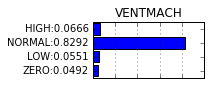

In [5]:
gnb.showPosterior(bn,{'HRSAT':[0.2,0,0]},"VENTMACH")

In [6]:
gnb.getPosterior(bn,{'HRSAT':[0.2,0.8,0.8]},"VENTMACH").tolist()

[0.05009339712203539,
 0.05610460580304813,
 0.838977652125844,
 0.05482434494907245]

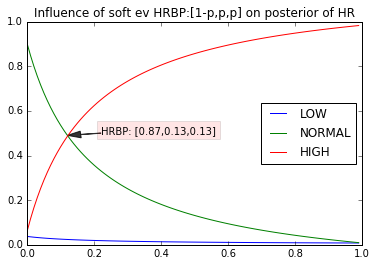

In [7]:
var="HR"

x=[p/100.0 for p in range(0,100)]
y=[gnb.getPosterior(bn,{'HRBP':[1-p/100.0,p/100.0,p/100.0]},var).toarray() for p in range(0,100)]

p=plot(x,y)
title("Influence of soft ev HRBP:[1-p,p,p] on posterior of HR");
v=bn.variableFromName(var);
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[1]>transpose(y)[2]).argmin()
inter_x=x[np1-1]
inter_y=y[np1-1][1]
text_x=inter_x+0.1
text_y=inter_y+0.01
msg="HRBP: [{0},{1},{1}]".format(1-x[np1],x[np1])
text(text_x,text_y,msg,bbox=dict(facecolor='red', alpha=0.1));
arrow(text_x,text_y,inter_x-text_x,inter_y-text_y, 
      length_includes_head=True,
      head_width=-0.03, head_length=0.04, 
      fc='k', ec='k',alpha=0.8)
pass